In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.5)

In [2]:
data = pd.read_json('ultimate_data_challenge.json')

In [3]:
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
#Filling in empty values with mean
data.avg_rating_of_driver = data.avg_rating_of_driver.fillna(data.avg_rating_of_driver.mean()).round(2)
data.avg_rating_by_driver = data.avg_rating_by_driver.fillna(data.avg_rating_by_driver.mean().round(2))
data.phone = data.phone.fillna(data.phone.mode()[0])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
data.signup_date = data.signup_date.astype('datetime64')
data.last_trip_date = data.last_trip_date.astype('datetime64')

In [8]:
#Creating a new column that states whether or not the user was active in the 6th month
data['active_6_mo'] = int()

active_rows = data.last_trip_date.dt.month == 6

data.loc[active_rows,'active_6_mo'] = int(1)
data.loc[~active_rows, 'active_6_mo'] = int(0)

In [9]:
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_6_mo
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,4.6,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


In [10]:
data.drop(columns=['signup_date', 'last_trip_date'], inplace = True)

In [11]:
data.ultimate_black_user = data.ultimate_black_user.map({True:1, False:0})

In [12]:
one_hot_city = pd.get_dummies(data.city,drop_first=True, prefix='city',dtype=int)
data = pd.concat([one_hot_city, data], axis=1)
data.drop(columns=['city'], inplace=True)

In [13]:
one_hot_phone = pd.get_dummies(data.phone, drop_first=True, prefix='phone',dtype=int)
data = pd.concat([one_hot_phone, data], axis=1)
data.drop(columns=['phone'], inplace=True)

In [14]:
data

,phone_iPhone,city_King's Landing,city_Winterfell,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_6_mo
0,1,1,0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1
1,0,0,0,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0
2,1,0,0,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0
3,1,1,0,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1
4,0,0,1,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,0,0,5.0,1.00,0.0,0,100.0,5.63,4.2,1
49996,1,0,0,1,4.6,1.00,0.0,0,0.0,0.00,4.0,0
49997,0,0,1,0,5.0,1.00,0.0,1,100.0,3.86,5.0,0
49998,1,0,0,2,3.0,1.00,0.0,0,100.0,4.58,3.5,0


In [15]:
X = data.drop(columns='active_6_mo')
y = data.active_6_mo

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, train_size = .75, random_state=30)

In [16]:
non_binary_cols = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge','surge_pct','weekday_pct', 'avg_dist','avg_rating_by_driver']
scaler = StandardScaler()

X_train[non_binary_cols] = scaler.fit_transform(X_train[non_binary_cols])
X_test[non_binary_cols] = scaler.transform(X_test[non_binary_cols])

In [17]:
X_test

,phone_iPhone,city_King's Landing,city_Winterfell,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
34627,1,1,0,5.482525,0.528354,-0.154510,-0.069277,0,0.144765,-0.694138,0.049958
31443,0,0,1,-0.602451,0.706524,-0.334313,-0.441317,0,1.053773,0.221630,0.498013
41987,1,1,0,-0.073323,0.350183,0.025292,-0.054194,1,-1.435884,-0.394206,0.049958
34402,1,0,0,1.514062,0.172013,-0.334313,-0.441317,1,0.638381,-0.523762,0.273985
39027,0,0,0,-0.602451,-0.006158,-0.334313,-0.441317,0,-0.294903,-0.161714,0.498013
...,...,...,...,...,...,...,...,...,...,...,...
5294,1,0,1,1.778626,0.706524,1.149059,1.232865,0,1.053773,0.072552,0.498013
38876,1,0,1,-0.073323,-0.184328,-0.334313,-0.441317,1,1.053773,0.452347,-1.742264
31460,1,0,1,-0.602451,0.706524,-0.334313,-0.441317,1,-0.834374,-0.458097,0.273985
296,1,0,1,-0.073323,0.706524,-0.334313,-0.441317,0,-0.745361,-0.497141,0.498013


In [18]:
losses = ['hinge', 'squared_hinge']
duals = [True,False]
learning_rates = list(np.linspace(.001, 1, 15))
penalties = ['l1','l2']
max_iters = [1000, 5000, 10000, 20000, 50000, 150000]

random_grid = {
    'C': learning_rates,
    'penalty': penalties,
    'max_iter': max_iters,
    'loss': losses,
    'dual': duals
}

svc = LinearSVC()

svc_rand = RandomizedSearchCV(estimator=svc, param_distributions=random_grid, n_iter=50, cv=3, scoring = 'roc_auc', n_jobs=-1)

res = svc_rand.fit(X_train, y_train)
res.best_params_

{'penalty': 'l2',
 'max_iter': 1000,
 'loss': 'squared_hinge',
 'dual': False,
 'C': 0.2864285714285714}

In [27]:
np.linspace(.001, 1, 15)

array([0.001     , 0.07235714, 0.14371429, 0.21507143, 0.28642857,
       0.35778571, 0.42914286, 0.5005    , 0.57185714, 0.64321429,
       0.71457143, 0.78592857, 0.85728571, 0.92864286, 1.        ])

In [19]:
#res.best_score_

In [20]:
res.best_score_

0.7518571777232511

In [21]:
svc = LinearSVC()

In [22]:
svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [23]:
## TODO : TEST ON TEST DATA

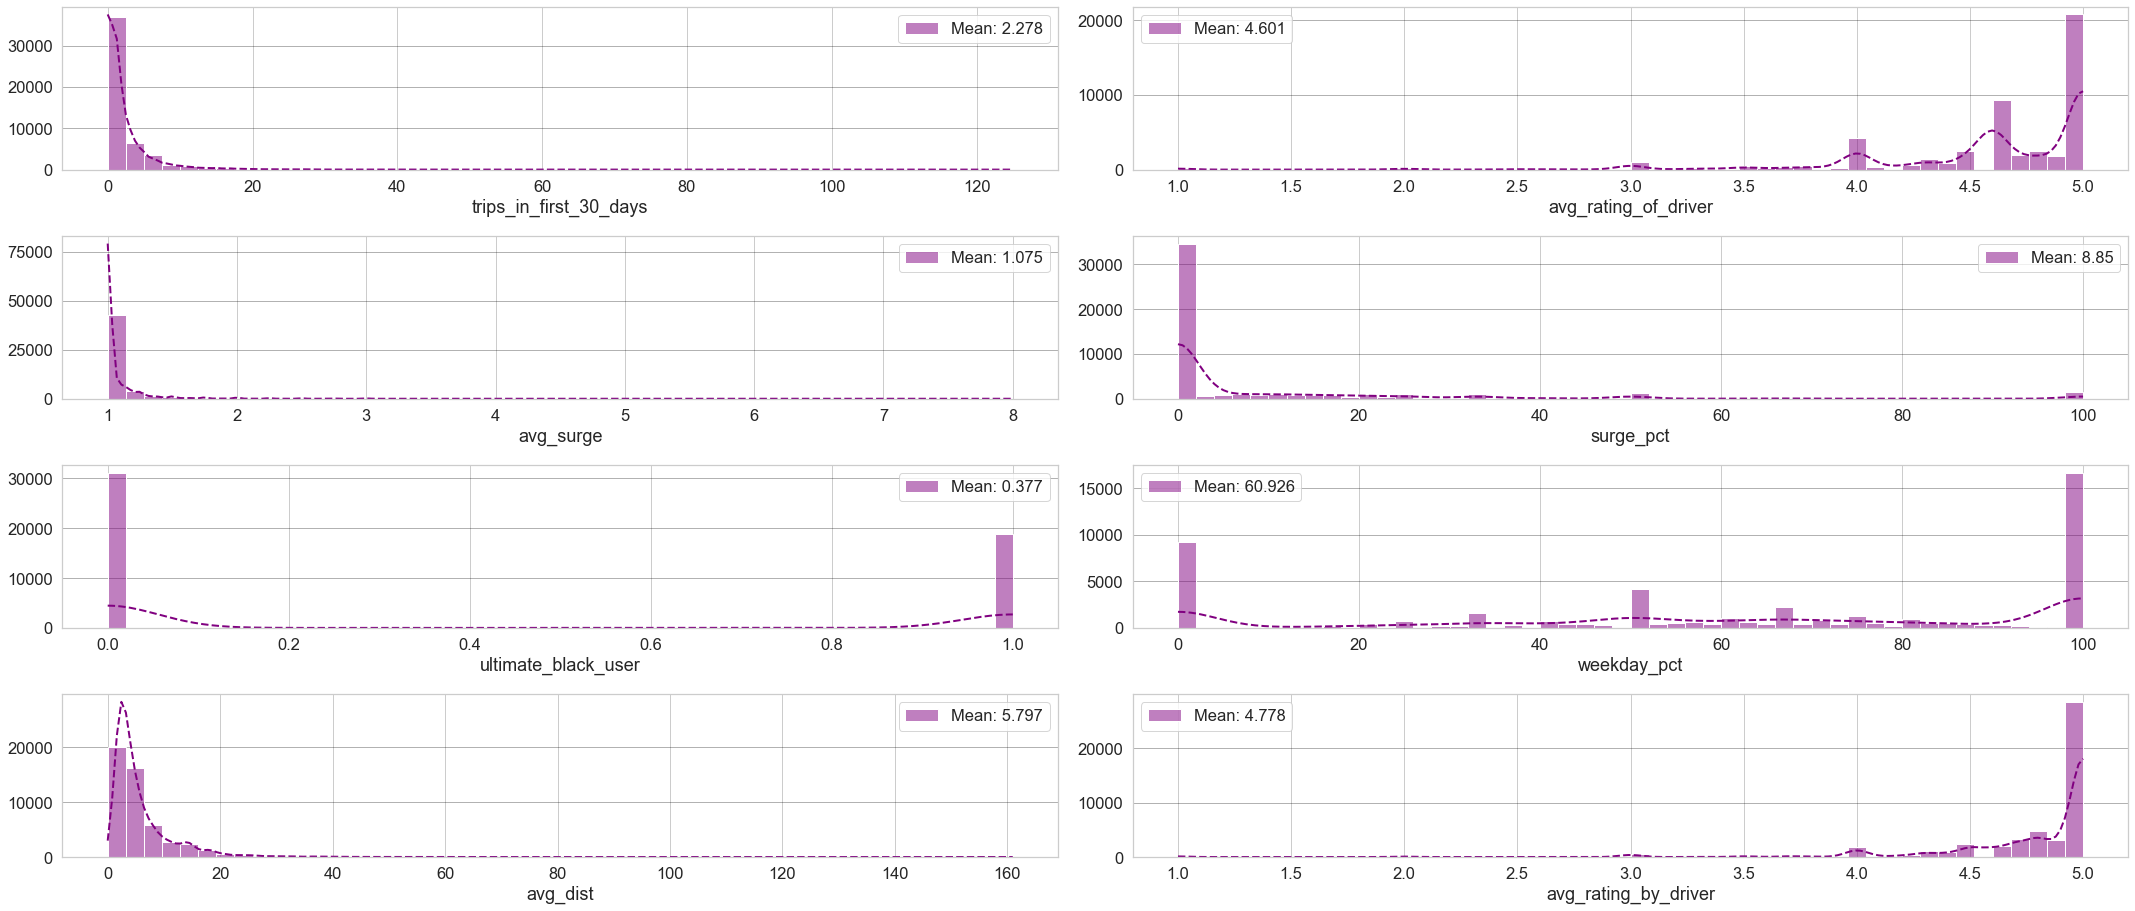

In [24]:
part = data.loc[:, 'trips_in_first_30_days':'avg_rating_by_driver']
figure, axes = plt.subplots(4,2, figsize=(30,13))

for ax, feature in zip(axes.flat, part.columns):
    ax.grid(axis='y', color='black',alpha=.3)
    g = sns.histplot(part[feature],ax=ax, bins=50, kde=True, color='purple', line_kws={'linestyle': '--','lw':2},
                    label='Mean: ' + str(round(part[feature].mean(), 3)))
    ax.legend(loc='best')
    g.set(ylabel=None)

plt.tight_layout()